In [19]:
import pandas as pd
import geopandas as gp 
import json
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline
from tqdm import tqdm
import glob
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress

In [20]:
files = glob.glob('../BL_Work/openPrescribe/savings/*.h5')
files.sort()
print files

['../BL_Work/openPrescribe/savings/201008.h5', '../BL_Work/openPrescribe/savings/201009.h5', '../BL_Work/openPrescribe/savings/201010.h5', '../BL_Work/openPrescribe/savings/201011.h5', '../BL_Work/openPrescribe/savings/201012.h5', '../BL_Work/openPrescribe/savings/201101.h5', '../BL_Work/openPrescribe/savings/201102.h5', '../BL_Work/openPrescribe/savings/201103.h5', '../BL_Work/openPrescribe/savings/201104.h5', '../BL_Work/openPrescribe/savings/201105.h5', '../BL_Work/openPrescribe/savings/201106.h5', '../BL_Work/openPrescribe/savings/201107.h5', '../BL_Work/openPrescribe/savings/201108.h5', '../BL_Work/openPrescribe/savings/201109.h5', '../BL_Work/openPrescribe/savings/201110.h5', '../BL_Work/openPrescribe/savings/201111.h5', '../BL_Work/openPrescribe/savings/201112.h5', '../BL_Work/openPrescribe/savings/201201.h5', '../BL_Work/openPrescribe/savings/201202.h5', '../BL_Work/openPrescribe/savings/201203.h5', '../BL_Work/openPrescribe/savings/201204.h5', '../BL_Work/openPrescribe/savings

In [80]:
files[65]

'../BL_Work/openPrescribe/savings/201601.h5'

In [21]:
pdp = pd.read_hdf(files[0])

In [125]:
pdp.head()

Unnamed: 0    0    1       2                3  \
0 39516       47804  Q44  01R  N81039  0101010C0BBAAAA   
  48486       56774  Q44  01R  N81068  0101010C0BBAAAA   
  51636       59924  Q44  01R  N81084  0101010C0BBAAAA   
  70194       79209  Q44  02D  N81087  0101010C0AAAAAA   
  81965       91523  Q44  02E  N81020  0101010C0AAAAAA   

                                                4    5      6      7      8  \
0 39516  Alu-Cap_Cap 475mg                         2.0  57.58  53.56  504.0   
  48486  Alu-Cap_Cap 475mg                         1.0  28.79  26.78  252.0   
  51636  Alu-Cap_Cap 475mg                         1.0  54.84  50.81  480.0   
  70194  Alum Hydrox_Cap 475mg                     1.0  38.39  35.67  336.0   
  81965  Alum Hydrox_Cap 475mg                     1.0  12.80  11.97  112.0   

         ...                   14     15         16         17   18  \
0 39516  ...  Aluminium Hydroxide  475.0  0101010C0  29.647059  1.0   
  48486  ...  Aluminium Hydroxide  475.0  0101010C0  14.823529  1.0   
  51636  ...  Aluminium Hydroxide  475.0  0101010C0  28.235294  1.0   
  70194  ...  Aluminium Hydroxide  475.0  0101010C0  19.764706  1.0   
  81965  ...  Aluminium Hydroxide  475.0  0101010C0   6.588235  1.0   

                19  20        21    22   23  
0 39516  29.647059  BB  0.112353  0.11  0.0  
  48486  14.823529  BB  0.112353  0.11  0.0  
  51636  28.235294  BB  0.112353  0.11  0.0  
  70194  19.764706  AA  0.112353  0.11  0.0  
  81965   6.588235  AA  0.112353  0.11  0.0  

[5 rows x 25 columns]

In [167]:
fentanyl = pdp[pdp['16'].str.contains('0309010C0')]
# fentanyl[fentanyl['20'] != 'AA']
fentanyl

Unnamed: 0    0    1       2                3  \
351 438            1761  Q44  01C  N81002  0309010C0AAAAAA   
    439            1762  Q44  01C  N81002  0309010C0AAADAD   
    3631           6366  Q44  01C  N81022  0309010C0AAAAAA   
    3632           6367  Q44  01C  N81022  0309010C0AAADAD   
    7019           9754  Q44  01C  N81027  0309010C0AAAAAA   
    7020           9755  Q44  01C  N81027  0309010C0AAADAD   
    8965          11700  Q44  01C  N81029  0309010C0AAADAD   
    10734         13469  Q44  01C  N81033  0309010C0AAADAD   
    13744         16479  Q44  01C  N81049  0309010C0AAAAAA   
    13745         16480  Q44  01C  N81049  0309010C0AAADAD   
    15163         17898  Q44  01C  N81052  0309010C0AAAAAA   
    15164         17899  Q44  01C  N81052  0309010C0AAADAD   
    19933         22668  Q44  01C  N81070  0309010C0AAAAAA   
    21718         26304  Q44  01C  N81077  0309010C0AAAAAA   
    21719         26305  Q44  01C  N81077  0309010C0AAADAD   
    23425         28011  Q44  01C  N81085  0309010C0AAAAAA   
    26559         31145  Q44  01C  N81088  0309010C0AAAAAA   
    28283         34150  Q44  01C  N81118  0309010C0AAAAAA   
    32666         39239  Q44  01R  N81008  0309010C0AAAAAA   
    32667         39240  Q44  01R  N81008  0309010C0AAADAD   
    41658         49946  Q44  01R  N81043  0309010C0AAAAAA   
    45030         53318  Q44  01R  N81047  0309010C0AAAAAA   
    45031         53319  Q44  01R  N81047  0309010C0AAADAD   
    48985         57273  Q44  01R  N81068  0309010C0AAAAAA   
    48986         57274  Q44  01R  N81068  0309010C0AAADAD   
    52157         60445  Q44  01R  N81084  0309010C0AAAAAA   
    52158         60446  Q44  01R  N81084  0309010C0AAADAD   
    56598         64886  Q44  01R  N81614  0309010C0AAADAD   
    59025         68040  Q44  02D  N81024  0309010C0AAAAAA   
    59026         68041  Q44  02D  N81024  0309010C0AAADAD   
...                 ...  ...  ...     ...              ...   
    9252825    10064644  Q70  11J  J81625  0309010C0AAADAD   
    9254321    10066140  Q70  11J  J81626  0309010C0AAAAAA   
    9254322    10066141  Q70  11J  J81626  0309010C0AAADAD   
    9255529    10067348  Q70  11J  J81628  0309010C0AAAAAA   
    9255530    10067349  Q70  11J  J81628  0309010C0AAADAD   
    9257376    10070281  Q70  11J  J81633  0309010C0AAADAD   
    9258650    10071555  Q70  11J  J81634  0309010C0AAAAAA   
    9260408    10073313  Q70  11J  J81637  0309010C0AAAAAA   
    9261708    10074732  Q70  11J  J81644  0309010C0AAADAD   
    9263905    10077721  Q70  11J  J81647  0309010C0AAADAD   
    9264751    10078567  Q70  11J  J81648  0309010C0AAADAD   
    9267017    10081170  Q70  99M  H81027  0309010C0AAAAAA   
    9267018    10081171  Q70  99M  H81027  0309010C0AAADAD   
    9268573    10082726  Q70  99M  H81088  0309010C0AAAAAA   
    9272434    10086587  Q70  99M  H81615  0309010C0AAADAD   
    9274083    10088280  Q70  99M  J82015  0309010C0AAADAD   
    9275640    10091043  Q70  99M  J82049  0309010C0AAAAAA   
    9277685    10093088  Q70  99M  J82066  0309010C0AAADAD   
    9279433    10094836  Q70  99M  J82067  0309010C0AAAAAA   
    9279434    10094837  Q70  99M  J82067  0309010C0AAADAD   
    9280963    10096366  Q70  99M  J82099  0309010C0AAAAAA   
    9280964    10096367  Q70  99M  J82099  0309010C0BBAAAD   
    9286027    10101430  Q70  99M  J82125  0309010C0AAAAAA   
    9287722    10103125  Q70  99M  J82135  0309010C0AAAAAA   
    9287723    10103126  Q70  99M  J82135  0309010C0AAADAD   
    9289423    10104826  Q70  99M  J82142  0309010C0AAADAD   
    9290857    10106260  Q70  99M  J82178  0309010C0AAAAAA   
    9293510    10109980  Q70  99M  J82198  0309010C0AAADAD   
    9294547    10112045  Q70  99M  J82628  0309010C0AAAAAA   
    9295522    10113020  Q70  99M  J82630  0309010C0AAAAAA   

                                                    4     5      6      7  \
351 438      Codeine Phos_Linct 15mg/5ml                1.0   1.84   1.72   
    439      C

In [22]:
%store -r opiod_BNF
# %store -r antiDep_BNF

In [23]:
# opiod_BNF = antiDep_BNF
opiod_BNF

,Unnamed: 0,BNF_code,NAME,UNII_drugbank
88,88,0104020D0,Codeine Phosphate Compound Mixtures ...,UX6OWY2V7J
90,90,0104020L0,Loperamide Hydrochloride ...,6X9OC3H4II
91,91,0104020N0,Opium & Morphine ...,76I7G6D29C
92,92,0104020P0,Loperamide Hydrochloride & Simeticone ...,6X9OC3H4II
154,154,0106060A0,Methylnaltrexone Bromide ...,0RK7M7IABE
155,155,0106060B0,Naloxegol ...,44T7335BKE
691,691,0309010C0,Codeine Phosphate ...,UX6OWY2V7J
693,693,0309010N0,Diamorphine Hydrochloride ...,70D95007SX
695,695,0309010S0,Methadone Hydrochloride ...,UC6VBE7V1Z
699,699,0309020AA,Ibuprofen/Pseudoephed HCl ...,WK2XYI10QM


In [24]:
LSOA_dist = json.load(open('scratchpad/GP_LSOA_PATIENTSDIST.json','rb'))

In [25]:
opiod_BNF.head()

,Unnamed: 0,BNF_code,NAME,UNII_drugbank
88,88,0104020D0,Codeine Phosphate Compound Mixtures ...,UX6OWY2V7J
90,90,0104020L0,Loperamide Hydrochloride ...,6X9OC3H4II
91,91,0104020N0,Opium & Morphine ...,76I7G6D29C
92,92,0104020P0,Loperamide Hydrochloride & Simeticone ...,6X9OC3H4II
154,154,0106060A0,Methylnaltrexone Bromide ...,0RK7M7IABE


In [26]:
ward_pop = pd.read_csv('scratchpad/ward_pop.csv')

In [27]:
GP_META = pd.read_csv('../BL_Work/epraccur.csv',header=None)
GP_META.rename(columns={0:'BP_code',
                        1:'Name',
                        2:'Grouping',
                        3:'National_geo',
                        4:'Addr1',
                        5:'Addr2',
                        6:'Addr3',
                        7: 'Addr4',
                        8:'Addr5',
                        9:'Postcode',
                        10:'Open',
                        11:'Closed',
                        12:'Status',
                        13:'Org type code',
                        14:'Commissioner',
                        15:'Join provider',
                        16:'Left provider',
                        17:'Contact',
                        18:'Null1',
                        19:'Null2',
                        20:'Null3',
                        21:'Amended',
                        22:'Null4',
                        23:'Provider',
                        24:'Null5',
                        25:'Setting',
                        26:'Null6'}, 
                 inplace=True)

In [28]:
Open_filtered_GPs = {}
for index,row in GP_META.iterrows():
    if row ['Setting'] == 4 and row['Status'] =='A':
        Open_filtered_GPs[row['BP_code']] = row['Postcode'].strip()

In [29]:
population = {}
for index, row in ward_pop.iterrows():
    population[row['Ward Code 1']] = float(row['All Ages'].replace(',',''))

In [30]:
population_borough = {}
for name,group in ward_pop.groupby('Local Authority'):
    population_borough[name] = 0.0
    for index , row in group.iterrows():
        population_borough[name] += float(row['All Ages'].replace(',',''))

In [31]:
pdp.head()

Unnamed: 0    0    1       2                3  \
0 8327         9404  Q30  5D7  A86011  0101010C0AAAAAA   
  35930       38180  Q30  5D7  A86040  0101010C0BBAAAA   
  60856       65924  Q30  5D8  A87016  0101010C0AAAAAA   
  64926       69994  Q30  5D8  A87020  0101010C0AAAAAA   
  69494       74562  Q30  5D8  A87029  0101010C0BBAAAA   

                                                4    5     6     7      8  \
0 8327   Alum Hydrox_Cap 475mg                     1.0  5.81  5.38  186.0   
  35930  Alu-Cap_Cap 475mg                         2.0  7.50  6.97  240.0   
  60856  Alum Hydrox_Cap 475mg                     1.0  5.25  4.86  168.0   
  64926  Alum Hydrox_Cap 475mg                     1.0  3.75  3.48  120.0   
  69494  Alu-Cap_Cap 475mg                         1.0  3.75  3.48  120.0   

         ...                   14     15         16    17   18    19  20  \
0 8327   ...  Aluminium Hydroxide  475.0  0101010C0   9.3  1.0   9.3  AA   
  35930  ...  Aluminium Hydroxide  475.0  0101010C0  12.0  1.0  12.0  BB   
  60856  ...  Aluminium Hydroxide  475.0  0101010C0   8.4  1.0   8.4  AA   
  64926  ...  Aluminium Hydroxide  475.0  0101010C0   6.0  1.0   6.0  AA   
  69494  ...  Aluminium Hydroxide  475.0  0101010C0   6.0  1.0   6.0  BB   

           21      22     23  
0 8327   0.03  0.0305  0.093  
  35930  0.03  0.0305  0.120  
  60856  0.03  0.0305  0.084  
  64926  0.03  0.0305  0.060  
  69494  0.03  0.0305  0.060  

[5 rows x 25 columns]

In [32]:
rantadine = pdp.loc[pdp['16'] == '0103010T0']

In [33]:
rantadine[rantadine['15']==150]

Unnamed: 0    0    1       2                3  \
34 28               28  Q30  5D7  A86003  0103010T0AAAAAA   
   31               31  Q30  5D7  A86003  0103010T0AAAIAI   
   2026           2026  Q30  5D7  A86004  0103010T0AAAAAA   
   3677           3677  Q30  5D7  A86006  0103010T0AAAAAA   
   4872           4872  Q30  5D7  A86007  0103010T0AAAAAA   
   5393           5393  Q30  5D7  A86008  0103010T0AAAAAA   
   7006           8083  Q30  5D7  A86010  0103010T0AAAAAA   
   8356           9433  Q30  5D7  A86011  0103010T0AAAAAA   
   9920          10997  Q30  5D7  A86012  0103010T0AAAAAA   
   11172         12249  Q30  5D7  A86013  0103010T0AAAAAA   
   12393         14636  Q30  5D7  A86017  0103010T0AAAAAA   
   12396         14639  Q30  5D7  A86017  0103010T0AAAIAI   
   13916         16159  Q30  5D7  A86018  0103010T0AAAAAA   
   15379         17622  Q30  5D7  A86020  0103010T0AAAAAA   
   16189         18432  Q30  5D7  A86021  0103010T0AAAAAA   
   17795         20038  Q30  5D7  A86022  0103010T0AAAAAA   
   19228         21471  Q30  5D7  A86023  0103010T0AAAAAA   
   20532         22775  Q30  5D7  A86024  0103010T0AAAAAA   
   21706         23949  Q30  5D7  A86025  0103010T0AAAAAA   
   23416         25659  Q30  5D7  A86026  0103010T0AAAAAA   
   24761         27004  Q30  5D7  A86027  0103010T0AAAAAA   
   25225         27468  Q30  5D7  A86028  0103010T0AAAAAA   
   25227         27470  Q30  5D7  A86028  0103010T0BBAAAA   
   26159         28402  Q30  5D7  A86029  0103010T0AAAAAA   
   26162         28405  Q30  5D7  A86029  0103010T0AAAIAI   
   26163         28406  Q30  5D7  A86029  0103010T0BBAAAA   
   27674         29917  Q30  5D7  A86030  0103010T0AAAAAA   
   29230         31473  Q30  5D7  A86031  0103010T0AAAAAA   
   29233         31476  Q30  5D7  A86031  0103010T0AAAIAI   
   30386         32630  Q30  5D7  A86033  0103010T0AAAAAA   
...                ...  ...  ...     ...              ...   
   8361917     9753301  Q39  5QQ  L83148  0103010T0AAAAAA   
   8362844     9755808  Q39  5QQ  L83616  0103010T0AAAAAA   
   8363596     9756560  Q39  5QQ  L83627  0103010T0AAAAAA   
   8364822     9757786  Q39  5QQ  L83628  0103010T0AAAAAA   
   8365930     9759565  Q39  5QQ  L83639  0103010T0AAAAAA   
   8366666     9762072  Q39  5QQ  L83655  0103010T0AAAAAA   
   8367684     9763090  Q39  5QQ  L83657  0103010T0AAAAAA   
   8368731     9764900  Q39  5QQ  L83663  0103010T0AAAAAA   
   8368732     9764901  Q39  5QQ  L83663  0103010T0BBAEAE   
   8369584     9765753  Q39  5QQ  L83666  0103010T0AAAAAA   
   8370269     9766438  Q39  5QQ  L83673  0103010T0AAAAAA   
   8370595     9767663  Q39  5QQ  Y00568  0103010T0AAAAAA   
   8371358     9769684  Q39  5QQ  Y02633  0103010T0AAAAAA   
   8372016     9770342  Q39  5ZW  L83013  0103010T0AAAAAA   
   8374155     9772481  Q39  5ZW  L83014  0103010T0AAAAAA   
   8374158     9772484  Q39  5ZW  L83014  0103010T0BBAAAA   
   8375776     9774102  Q39  5ZW  L83027  0103010T0AAAAAA   
   8377177     9775503  Q39  5ZW  L83029  0103010T0AAAAAA   
   8378583     9778718  Q39  5ZW  L83055  0103010T0AAAAAA   
   8378586     9778721  Q39  5ZW  L83055  0103010T0BBAAAA   
   8380532     9780667  Q39  5ZW  L83078  0103010T0AAAAAA   
   8380534     9780669  Q39  5ZW  L83078  0103010T0AAAIAI   
   8382066     9782201  Q39  5ZW  L83103  0103010T0AAAAAA   
   8382069     9782204  Q39  5ZW  L83103  0103010T0BBAAAA   
   8384039     9785445  Q39  5ZW  L83111  0103010T0AAAAAA   
   8385780     9788209  Q39  5ZW  L83118  0103010T0AAAAAA   
   8387005     9793032  Q39  5ZW  L83131  0103010T0AAAAAA   
   8387007     9793034  Q39  5ZW  L83131  0103010T0AAAIAI   
   8388726     9795729  Q39  5ZW  L83607  0103010T0AAAAAA   
   8388728     9795731  Q39  5ZW  L83607  0103010T0BBAAAA   

                                                   4     5       6       7  \
34 28       Ranitidine HCl_Tab 150mg                  47.0  102.93   96.25   
   31       Ranitidine HCl_Tab Eff 150mg               1.0   17.70   16.3

In [34]:
opioids = pdp.loc[pdp['16'].isin(opiod_BNF['BNF_code'])]

In [35]:
non_generic_opioid = opioids.loc[opioids['20']!='AA']

In [36]:
sum(non_generic_opioid['23'])

303319.84835714626

In [37]:
sum(opioids['7'])

19498899.660013113

In [38]:
len(non_generic_opioid), len(opioids)

(82520, 288518)

In [39]:
GP_postcodes_long = {}
for name , group in non_generic_opioid.groupby('2'):
    postcode = list(set(group['10']))
    GP_postcodes_long[name] = str(postcode[0]).strip()

In [40]:
ward_df = pd.read_csv('../BL_Work/pcd11_par11_wd11_lad11_ew_lu.csv')

# ward_df.head()

ward_postcode_map = {}
for name, group in ward_df.groupby('wd11cd'):
    ward_postcode_map[name] = list(group['pcds'])

/home/sagar/anaconda3/envs/env_py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (5,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
LSOA_savings = {}

for name, group in tqdm(non_generic_opioid.groupby('2')):
    total_saving = np.sum(group['23'])
    if name in LSOA_dist:        
        for k in LSOA_dist[name]:
            if k not in LSOA_savings:
                LSOA_savings[k] = 0.0
            LSOA_savings[k]+= float(total_saving)*float(LSOA_dist[name][k])

100%|██████████| 6646/6646 [00:05<00:00, 1167.73it/s]


In [42]:
%store -r Ward_prevalence
%store -r Ward_patients
%store -r DiseasePop_byWard

In [43]:
df = pd.read_csv('../BL_Work/Lower_Layer_Super_Output_Area_2011_to_Ward_2015_Lookup_in_England_and_Wales.csv')

In [44]:
wardMap = {}
for name , group in df.groupby('WD15CD'):
        wardMap[name] = list(group['LSOA11CD'])

In [45]:
boroughMap = {}
for name , group in df.groupby('LAD15NM'):
        boroughMap[name] = list(group['LSOA11CD'])

In [46]:
population_borough = {}
for name,group in ward_pop.groupby('Local Authority'):
    population_borough[name] = 0.0
    for index , row in group.iterrows():
        population_borough[name] += float(row['All Ages'].replace(',',''))

In [47]:
borough_savings_UK = {}

for k in boroughMap:
    try:
        borough_savings= np.sum([LSOA_savings[w] for w in boroughMap[k] if not np.isnan(LSOA_savings[w])])
        pop = population_borough[k]
        borough_savings_UK[k] = (float(borough_savings)/float(pop))*1000.0
        
    except:
        print "Some ward had wrong data"

Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


In [48]:
borough_savings_UK

{'Adur': 6.436231401983831,
 'Allerdale': 3.378537411920643,
 'Amber Valley': 2.0412491565585573,
 'Arun': 5.3171451681874276,
 'Ashfield': 3.2369200163395475,
 'Ashford': 11.639270018491231,
 'Aylesbury Vale': 2.866005436645724,
 'Babergh': 18.757198665227577,
 'Barking and Dagenham': 4.607189852922233,
 'Barnet': 1.5381755933506325,
 'Barnsley': 5.278377122799099,
 'Barrow-in-Furness': 6.3404539733738385,
 'Basildon': 3.1117641988317954,
 'Basingstoke and Deane': 3.314988747580268,
 'Bassetlaw': 5.288226117328803,
 'Bath and North East Somerset': 3.5080112335084546,
 'Bedford': 6.471467965638308,
 'Bexley': 8.594393008349648,
 'Birmingham': 4.100487856080527,
 'Blaby': 7.989305020070649,
 'Blackburn with Darwen': 3.9793273548690093,
 'Blackpool': 7.819852109417434,
 'Bolsover': 2.736299772681294,
 'Bolton': 5.847322610125084,
 'Boston': 12.607761208932747,
 'Bournemouth': 1.1620771376257142,
 'Bracknell Forest': 6.788472969531297,
 'Bradford': 3.503486780096818,
 'Braintree': 9.79743

In [82]:
monthly_borough_savings = {}
monthly_borough_dosage = {}
monthly_borough_costs = {}
fail = 0
for f in tqdm(files[65:77]):
    month = f.split('/')[-1].split('.')[0]
    monthly_borough_savings[month] = {}
    pdp = pd.read_hdf(f)
    opioids = pdp.loc[pdp['16'].isin(opiod_BNF['BNF_code'])]
    non_generic_opioid = opioids.loc[opioids['20']!='AA']
    LSOA_savings = {}
    LSOA_dosage = {}
    LSOA_costs = {}
    for name, group in opioids.groupby('2'):
        total_dosage = np.sum(group['19'])
        total_cost = np.sum(group['7'])
        if name in LSOA_dist:        
            for k in LSOA_dist[name]:
                if k not in LSOA_dosage:
                    LSOA_dosage[k] = 0.0
                    LSOA_costs[k] = 0.0
                LSOA_dosage[k]+= float(total_dosage)*float(LSOA_dist[name][k])
                LSOA_costs[k]+= float(total_cost)*float(LSOA_dist[name][k])
    
    for name, group in non_generic_opioid.groupby('2'):
        total_saving = np.sum(group['23'])
        if name in LSOA_dist:        
            for k in LSOA_dist[name]:
                if k not in LSOA_savings:
                    LSOA_savings[k] = 0.0
                LSOA_savings[k]+= float(total_saving)*float(LSOA_dist[name][k])
    
    borough_savings_UK = {}
    borough_dosage_UK = {}
    borough_cost_UK = {}
    for k in boroughMap:
        try:
            borough_savings= np.sum([LSOA_savings[w] for w in boroughMap[k] if not np.isnan(LSOA_savings[w])])
            borough_dosages= np.sum([LSOA_dosage[w] for w in boroughMap[k] if not np.isnan(LSOA_dosage[w])])
            borough_costs= np.sum([LSOA_costs[w] for w in boroughMap[k] if not np.isnan(LSOA_costs[w])])
            
            pop = population_borough[k]
            borough_savings_UK[k] = float(borough_savings)
            borough_dosage_UK[k] = (float(borough_dosages)/float(pop))*1000.0
            borough_cost_UK[k] = (float(borough_costs)/float(pop))*1000.0

        except:
            fail+=1
    
    monthly_borough_savings[month]  = borough_savings_UK
    monthly_borough_dosage[month]  = borough_dosage_UK
    monthly_borough_costs[month] = borough_cost_UK



  0%|          | 0/12 [00:00<?, ?it/s]

  8%|▊         | 1/12 [00:52<09:35, 52.31s/it]

 17%|█▋        | 2/12 [01:45<08:46, 52.64s/it]

 25%|██▌       | 3/12 [02:37<07:50, 52.26s/it]

 33%|███▎      | 4/12 [03:22<06:41, 50.20s/it]

 42%|████▏     | 5/12 [04:16<05:58, 51.21s/it]

 50%|█████     | 6/12 [05:05<05:04, 50.67s/it]

 58%|█████▊    | 7/12 [05:56<04:14, 50.82s/it]

 67%|██████▋   | 8/12 [06:48<03:24, 51.14s/it]

 75%|███████▌  | 9/12 [07:42<02:35, 51.89s/it]

 83%|████████▎ | 10/12 [08:33<01:43, 51.75s/it]

 92%|█████████▏| 11/12 [09:27<00:52, 52.34s/it]

100%|██████████| 12/12 [10:18<00:00, 51.84s/it]

In [83]:
UKwide_opioid = {}
UKUKwide_opioid_costs = {}
for k in monthly_borough_savings:
    UKwide_opioid[k] = sum(monthly_borough_savings[k].values())
for k in monthly_borough_costs:
    total = []
    for b in monthly_borough_costs[k]:
        scale = float( population_borough[b])/1000.0
        total.append(monthly_borough_costs[k][b]*scale)
    UKUKwide_opioid_costs[k] = sum(total)

In [84]:
monthly_borough_savings_opioid = monthly_borough_savings
monthly_borough_dosage_opioid = monthly_borough_dosage
monthly_borough_costs_opioid = monthly_borough_costs

In [85]:
overspend_opioid = {}
overspend_opioid['savings'] = UKwide_opioid
overspend_opioid['costs'] = UKUKwide_opioid_costs

In [86]:
%store overspend_opioid

Stored 'overspend_opioid' (dict)


In [87]:
# %store monthly_borough_savings_opioid
# %store monthly_borough_dosage_opioid
# %store monthly_borough_costs_opioid


# %store -r monthly_borough_savings_opioid
# %store -r monthly_borough_dosage_opioid
# %store -r monthly_borough_costs_opioid

In [88]:
monthly_borough_savings_opioid

{'201601': {'Adur': 658.8162264657174,
  'Allerdale': 972.4102871140888,
  'Amber Valley': 1014.9163543773626,
  'Arun': 2839.866222776215,
  'Ashfield': 2390.911286177442,
  'Ashford': 6067.1556654585675,
  'Aylesbury Vale': 1963.1402210275019,
  'Babergh': 3952.1328628282126,
  'Barking and Dagenham': 1655.1580741923956,
  'Barnet': 9527.30278396111,
  'Barnsley': 6116.584723565569,
  'Barrow-in-Furness': 1307.7539581178874,
  'Basildon': 5504.107549382076,
  'Basingstoke and Deane': 4299.772789837847,
  'Bassetlaw': 3181.089955163768,
  'Bath and North East Somerset': 2183.2970056151357,
  'Bedford': 1769.9958908430233,
  'Bexley': 8430.09648142177,
  'Birmingham': 23217.00061545164,
  'Blaby': 1233.3901833821326,
  'Blackburn with Darwen': 3228.1546161909696,
  'Blackpool': 2625.988105230894,
  'Bolsover': 968.6865800377624,
  'Bolton': 11720.727597525642,
  'Boston': 1423.2998412788859,
  'Bournemouth': 2132.255087962922,
  'Bracknell Forest': 834.4523777264154,
  'Bradford': 1628

In [89]:
# %store -r monthly_borough_savings

In [90]:
IMD_District = json.load(open('scratchpad/District_IMD_scores_life_values.json','rb'))

In [133]:
IMD_District

{u'Adur': {u'District Code': [u'E07000223'],
  u'IMD': {u'mean_values': {u'Barriers to Housing and Services Score': 17.706571428571433,
    u'Crime Score': -0.1049047619047619,
    u'Education, Skills and Training Score': 28.01047619047619,
    u'Employment Score (rate)': 0.10511904761904763,
    u'Health Deprivation and Disability Score': -0.005071428571428567,
    u'Income Score (rate)': 0.12354761904761905,
    u'Living Environment Score': 18.868476190476194},
   u'median_values': {u'Barriers to Housing and Services Score': 17.7195,
    u'Crime Score': 0.030500000000000003,
    u'Education, Skills and Training Score': 26.0565,
    u'Employment Score (rate)': 0.086,
    u'Health Deprivation and Disability Score': -0.0365,
    u'Income Score (rate)': 0.10250000000000001,
    u'Living Environment Score': 17.901}},
  u'Life Values': {u'Anxiety': -1,
   u'Happiness': -1,
   u'Life Satisfaction': 56.42,
   u'Worthwhile': 45.7},
  u'aggregate_IMD': 18.275,
  u'pop_density': 1466.0302032741

In [146]:
savings = {}
for month in monthly_borough_savings:
    for dist in monthly_borough_savings[month]:
        if dist not in savings:
            savings[dist] = 0.0
        else:
            savings[dist]+=monthly_borough_savings[month][dist]
dose = {}
for month in monthly_borough_dosage:
    for dist in monthly_borough_dosage[month]:
        if dist not in dose:
            dose[dist] = 0.0
        else:
            dose[dist]+=monthly_borough_dosage[month][dist]

cost = {}
for month in monthly_borough_costs:
    for dist in monthly_borough_costs[month]:
        if dist not in cost:
            cost[dist] = 0.0
        else:
            cost[dist]+=monthly_borough_costs[month][dist]

            
dict_saving = {'Name':[],'Savings':[] , 'Population' :[] ,'Dosage':[] , 'Density' : [] , 'Seniors' : [] , 'IMD' : [] , 'TotalCost':[]}
for s in savings:
    dict_saving['Name'].append(s)
    dict_saving['Savings'].append(savings[s])
    dict_saving['TotalCost'].append(cost[s])
    dict_saving['Dosage'].append(dose[s])
    dict_saving['Density'].append(IMD_District[s]['pop_density'])
    dict_saving['Population'].append(IMD_District[s]['population'])
    dict_saving['Seniors'].append(IMD_District[s]['senior_pop'])
    dict_saving['IMD'].append(IMD_District[s]['aggregate_IMD'])



savings_opioid_df = pd.DataFrame(dict_saving)

In [147]:
% store savings_opioid_df

Stored 'savings_opioid_df' (DataFrame)


In [148]:
savings_opioid_df['Savings_norm'] = (savings_opioid_df['Savings']/savings_opioid_df['Population'])*1000

In [94]:
england = gp.read_file('../BL_Work/Local_Authority_Districts_December_2017_Ultra_Generalised_Clipped_Boundaries_in_United_Kingdom_WGS84.shp')

In [152]:
england.head()

,objectid,lad17cd,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,None,447157,531476,-1.27023,54.676159,9.658682e+07,50245.931523,POLYGON ((-1.243847684350774 54.72307842291248...
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544670,5.474167e+07,35458.505804,POLYGON ((-1.200218340036424 54.58300135026919...
2,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,54.567520,2.471405e+08,78666.802657,(POLYGON ((-1.200218311029187 54.5830013303063...
3,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,54.556911,2.064738e+08,86947.340766,POLYGON ((-1.193937249483723 54.62987548771687...
4,5,E06000005,Darlington,None,428029,515649,-1.56835,54.535351,1.982990e+08,91341.118700,POLYGON ((-1.439939711064031 54.59520822980085...


In [153]:
merged = england.set_index('lad17nm').join(savings_opioid_df.set_index('Name'))
merged = merged[np.isfinite(merged['Savings'])]

In [154]:
merged

,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Density,Dosage,IMD,Population,Savings,Seniors,TotalCost,Savings_norm
lad17nm,,,,,,,,,,,,,,,,,,
Hartlepool,1,E06000001,None,447157,531476,-1.270230,54.676159,9.658682e+07,50245.931523,POLYGON ((-1.243847684350774 54.72307842291248...,954.975046,121797.395296,33.178,92238.0,43275.231222,0.236996,8607.415137,469.169228
Middlesbrough,2,E06000002,None,451141,516887,-1.210990,54.544670,5.474167e+07,35458.505804,POLYGON ((-1.200218340036424 54.58300135026919...,2534.522698,162021.385247,40.216,138744.0,60727.540270,0.205897,9979.994494,437.694893
Redcar and Cleveland,3,E06000003,None,464359,519597,-1.006110,54.567520,2.471405e+08,78666.802657,(POLYGON ((-1.200218311029187 54.5830013303063...,546.239964,105152.589610,28.567,134998.0,73192.549802,0.268515,7924.489906,542.175068
Stockton-on-Tees,4,E06000004,None,444937,518183,-1.306690,54.556911,2.064738e+08,86947.340766,POLYGON ((-1.193937249483723 54.62987548771687...,927.265325,97446.805103,24.625,191456.0,74036.805011,0.222208,7759.535527,386.704021
Darlington,5,E06000005,None,428029,515649,-1.568350,54.535351,1.982990e+08,91341.118700,POLYGON ((-1.439939711064031 54.59520822980085...,530.754153,73080.096403,23.639,105248.0,31288.577500,0.242703,7554.813263,297.284295
Halton,6,E06000006,None,354246,382146,-2.688530,53.334240,8.097198e+07,59054.624290,(POLYGON ((-2.695154845015741 53.3846370930314...,1552.290033,95359.412414,31.943,125692.0,44373.329674,0.221804,6772.179381,353.032251
Warrington,7,E06000007,None,362744,388456,-2.561670,53.391628,1.805179e+08,71160.979991,POLYGON ((-2.491122301223966 53.46052933409025...,1121.212917,60256.981095,19.312,202399.0,64031.756915,0.225263,4847.922934,316.363998
Blackburn with Darwen,8,E06000008,None,369490,422806,-2.463600,53.700802,1.389175e+08,55608.031446,POLYGON ((-2.467231781284216 53.78102305145166...,1063.314455,74562.058660,34.189,147713.0,44235.500123,0.185305,6138.385138,299.469242
Blackpool,9,E06000009,None,332763,436633,-3.022840,53.821610,3.670436e+07,31400.593997,POLYGON ((-3.012012683936433 53.82639068184907...,3868.096727,101058.872912,41.997,141976.0,39637.824352,0.258114,7683.487128,279.186795


In [155]:
# merged.to_csv('Opioid_borough_All_data.csv')

In [160]:
savings_opioid_df.head()

,Density,Dosage,IMD,Name,Population,Savings,Seniors,TotalCost,Savings_norm
0,148.343861,60668.276372,17.204,Mendip,109755,44862.994361,0.273837,4233.016877,408.755814
1,731.965927,31558.154775,8.857,Windsor and Maidenhead,145822,21290.473812,0.228971,2527.632222,146.003167
2,501.819129,67476.216882,22.066,Wyre Forest,98074,64819.513014,0.294166,4364.046152,660.924537
3,540.901368,36563.771390,27.659,Peterborough,185829,73696.106272,0.188738,3177.292301,396.580223
4,372.224833,36135.379851,15.263,Epping Forest,126080,29337.209372,0.249024,4163.376114,232.687257


In [162]:
savings_opioid_df['Dosage_total'] = (savings_opioid_df['Dosage']/1000)*savings_opioid_df['Population']

In [163]:
from scipy.stats import pearsonr

pearsonr(savings_opioid_df['Dosage_total'] , savings_opioid_df['Density'])

(0.09237105611371771, 0.09592115575531265)

In [236]:
sorted_savings = merged.sort_values('Savings')

top = sorted_savings[-5:]
bottom = sorted_savings[:5]

In [237]:
top

,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Density,Dosage,IMD,Population,Savings,Seniors,TotalCost,Savings_norm
lad17nm,,,,,,,,,,,,,,,,,,
Cornwall,51,E06000052,None,212501,64494,-4.64249,50.450230,3.577952e+09,524110.727736,(POLYGON ((-5.095704032469199 50.1028398800814...,150.341320,71691.269823,23.833,537914.0,268205.203427,0.300067,6238.623098,498.602385
Manchester,260,E08000003,None,384591,397063,-2.23359,53.470089,1.135375e+08,67315.246757,POLYGON ((-2.187461944777164 53.52930264454186...,4493.239437,70819.744038,40.512,510151.0,275075.909942,0.129975,6219.863386,539.204882
Leeds,291,E08000035,None,432528,436384,-1.50736,53.822731,5.521011e+08,133073.475482,POLYGON ((-1.315291517843783 53.90491419418245...,1369.698485,56131.229567,26.623,756212.0,298189.580256,0.200211,5734.557693,394.320085
Liverpool,269,E08000012,None,339361,390553,-2.91364,53.408298,1.114464e+08,55002.224995,POLYGON ((-2.820171496745364 53.34825641244568...,4202.890623,86098.681968,41.126,468397.0,327226.557013,0.194431,5894.505523,698.609421
Birmingham,281,E08000025,None,408150,287352,-1.88141,52.484039,2.672268e+08,89005.584803,POLYGON ((-1.789538963230629 52.58822193319287...,4059.626653,57260.831490,37.768,1084841.0,366421.000652,0.171857,4046.057737,337.764705


In [238]:
bottom

,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Density,Dosage,IMD,Population,Savings,Seniors,TotalCost,Savings_norm
lad17nm,,,,,,,,,,,,,,,,,,
Isles of Scilly,52,E06000053,None,91327,11447,-6.30217,49.923321,1.307906e+07,41644.438756,(POLYGON ((-6.277341073078234 49.9284118826724...,173.101171,26054.506877,12.013,2264.0,141.431997,0.309629,3456.167434,62.469964
City of London,294,E09000001,None,532382,181358,-0.09351,51.515640,3.081566e+06,7498.316672,POLYGON ((-0.08177556052256291 51.507382134289...,2467.576565,44099.727197,13.602,7604.0,714.611103,0.207654,1913.628318,93.978314
West Somerset,209,E07000191,None,294768,136702,-3.50494,51.119900,7.276089e+08,155398.603827,POLYGON ((-3.052948167860429 51.20380246181796...,47.496670,55338.341746,23.293,34559.0,6891.875110,0.388408,2968.420670,199.423453
Purbeck,91,E07000051,None,391183,88321,-2.12618,50.694450,4.036919e+08,135546.481426,(POLYGON ((-2.108770789446625 50.7935572940922...,112.187049,64605.929318,13.803,45289.0,8143.488033,0.328932,4144.575094,179.811611
Melton,162,E07000133,None,477328,323472,-0.85440,52.803291,4.817632e+08,117555.990931,POLYGON ((-0.665698026857911 52.75706704880804...,105.383722,56319.174614,13.119,50770.0,8670.948354,0.261670,3828.032201,170.788819


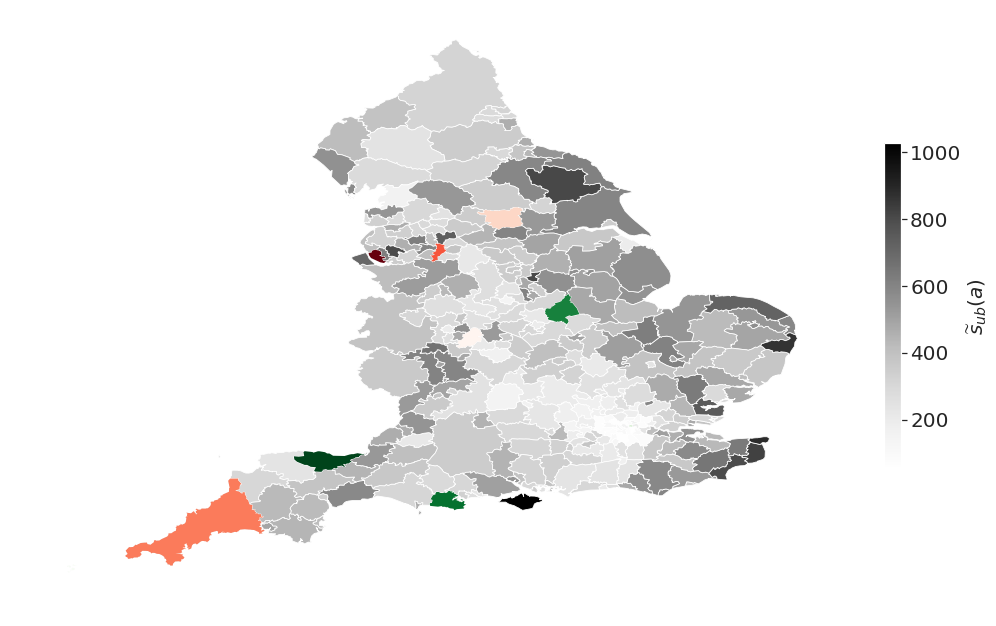

In [239]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Savings_norm'
vmin, vmax = min(savings_opioid_df['Savings_norm']) , max(savings_opioid_df['Savings_norm'])

fig, ax = plt.subplots(1, figsize=(18, 12))
merged.plot(column=variable, cmap='Greys', linewidth=0.8, ax=ax, edgecolor='1')
ax.axis('off')

top.plot(column=variable, cmap='Reds', linewidth=0,alpha=1 , ax=ax, edgecolor='Red')

bottom.plot(column=variable, cmap='Greens', linewidth=0,alpha=1 , ax=ax, edgecolor='Green')

    
# ax.set_title('Overspending for opioids', fontdict={'fontsize': 25, 'fontweight' : 5})
sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar = fig.colorbar(sm,shrink=0.5)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('$\widetilde s_{ub}(a)$', fontsize = 20)

In [240]:
sorted_dosage = merged.sort_values('Dosage')

top_dosage = sorted_dosage[-5:]
bottom_dosage = sorted_dosage[:5]

In [241]:
top_dosage

,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Density,Dosage,IMD,Population,Savings,Seniors,TotalCost,Savings_norm
lad17nm,,,,,,,,,,,,,,,,,,
Mansfield,197,E07000174,None,455047,363637,-1.178040,53.167030,7.720534e+07,45206.535812,"POLYGON ((-1.17944227710043 53.11511719862199,...",1356.602970,108091.329051,27.764,104737.0,84461.624584,0.237662,6382.810359,806.416305
Gateshead,293,E08000037,None,420168,559658,-1.686800,54.931198,1.439737e+08,66446.169810,POLYGON ((-1.771317411933942 54.98106169870943...,1390.204994,118338.662715,25.932,200153.0,56372.979982,0.241265,7564.982310,281.649438
Hartlepool,1,E06000001,None,447157,531476,-1.270230,54.676159,9.658682e+07,50245.931523,POLYGON ((-1.243847684350774 54.72307842291248...,954.975046,121797.395296,33.178,92238.0,43275.231222,0.236996,8607.415137,469.169228
East Lindsey,166,E07000137,None,534862,376106,0.020549,53.264832,1.768733e+09,203817.461419,POLYGON ((0.2011338297554721 53.03052967594834...,77.228163,124055.979316,28.855,136596.0,77321.778882,0.354352,9466.581944,566.061809
Middlesbrough,2,E06000002,None,451141,516887,-1.210990,54.544670,5.474167e+07,35458.505804,POLYGON ((-1.200218340036424 54.58300135026919...,2534.522698,162021.385247,40.216,138744.0,60727.540270,0.205897,9979.994494,437.694893


In [242]:
bottom_dosage

,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Density,Dosage,IMD,Population,Savings,Seniors,TotalCost,Savings_norm
lad17nm,,,,,,,,,,,,,,,,,,
Watford,133,E07000103,None,510441,198197,-0.40429,51.671700,2.147240e+07,20708.591088,POLYGON ((-0.3771436046679297 51.6933970267353...,4272.088650,19319.907075,15.723,91732.0,17058.931312,0.168970,1672.794132,185.964890
Richmond upon Thames,320,E09000027,None,519005,172648,-0.28914,51.440331,5.770003e+07,45584.205186,POLYGON ((-0.2233044597400357 51.4728713458722...,3278.074472,19442.955056,10.037,189145.0,14542.185242,0.192085,2094.129100,76.883794
Kingston upon Thames,314,E09000021,None,519508,167389,-0.28367,51.392960,3.740092e+07,33355.996499,POLYGON ((-0.2526494526044319 51.4330825227881...,4382.405698,19869.566515,11.125,163906.0,16360.034536,0.176351,1908.160234,99.813518
Elmbridge,225,E07000207,None,511882,163658,-0.39441,51.360981,9.581408e+07,43336.030948,POLYGON ((-0.319278024690437 51.39418756881945...,1372.574844,22213.462660,7.527,131512.0,28645.429881,0.225934,2826.978752,217.816092
Epsom and Ewell,226,E07000208,None,521176,161475,-0.26172,51.339451,3.416172e+07,26189.916695,POLYGON ((-0.2225309973382129 51.3303924677696...,2226.234258,22357.709477,8.544,76052.0,9813.008611,0.231276,2362.463246,129.030250


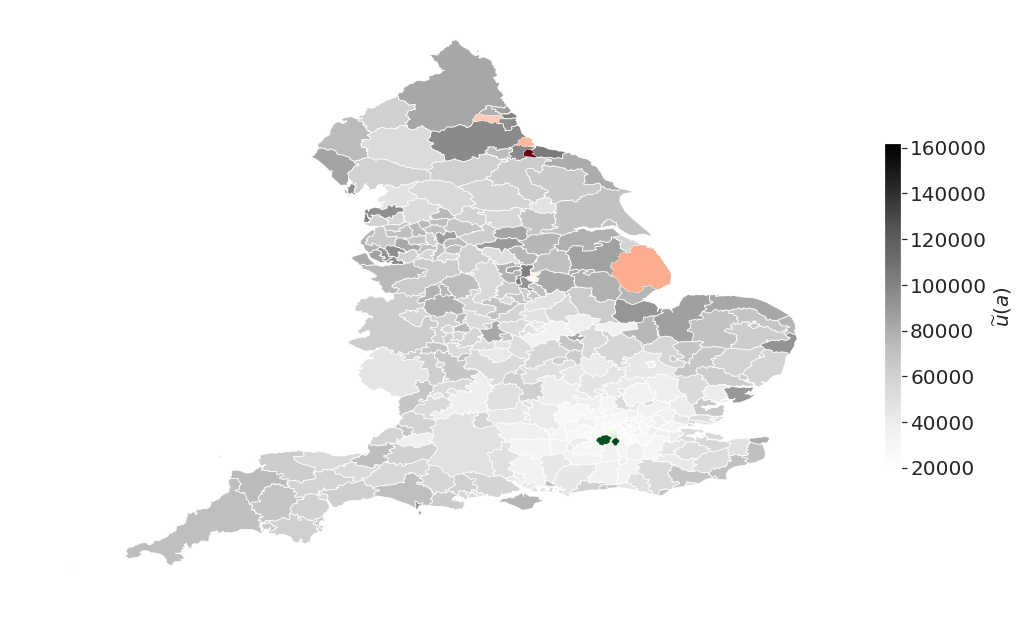

In [243]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Dosage'
vmin, vmax = min(savings_opioid_df['Dosage']) , max(savings_opioid_df['Dosage'])

fig, ax = plt.subplots(1, figsize=(18, 12))
merged.plot(column=variable, cmap='Greys', linewidth=0.8, ax=ax, edgecolor='1')
ax.axis('off')

top_dosage.plot(column=variable, cmap='Reds', linewidth=0,alpha=1 , ax=ax, edgecolor='Red')

bottom_dosage.plot(column=variable, cmap='Greens', linewidth=0,alpha=1 , ax=ax, edgecolor='Green')

# ax.set_title('Normalized dosages per 1000', fontdict={'fontsize': 25, 'fontweight' : 5})
sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar = fig.colorbar(sm,shrink=0.5)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('$\widetilde u(a)$', fontsize = 20)

In [131]:
savings_opioid_df[savings_opioid_df['Dosage'] == max(savings_opioid_df['Dosage'])]

,Density,Dosage,IMD,Name,Savings,Seniors,TotalCost
145,2534.522698,162021.385247,40.216,Middlesbrough,60727.54027,0.205897,9979.994494


In [132]:
savings_opioid_df[savings_opioid_df['Savings'] == max(savings_opioid_df['Savings'])]

,Density,Dosage,IMD,Name,Savings,Seniors,TotalCost
231,4059.626653,57260.83149,37.768,Birmingham,366421.000652,0.171857,4046.057737


In [104]:
standardized_merged = merged.copy()

In [105]:
def normalize(df,feature_names):
    result = df.copy()
    for feature_name in feature_names:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [106]:
standardized_merged = normalize(merged , ['Savings','Density','Dosage','IMD','Seniors'])

In [107]:
standardized_merged.head()

,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Density,Dosage,IMD,Savings,Seniors,TotalCost
lad17nm,,,,,,,,,,,,,,,,
Hartlepool,1,E06000001,None,447157,531476,-1.27023,54.676159,9.658682e+07,50245.931523,POLYGON ((-1.243847684350774 54.72307842291248...,0.067302,0.718125,0.761571,0.117762,0.502048,8607.415137
Middlesbrough,2,E06000002,None,451141,516887,-1.21099,54.544670,5.474167e+07,35458.505804,POLYGON ((-1.200218340036424 54.58300135026919...,0.181541,1.000000,0.951849,0.165409,0.399775,9979.994494
Redcar and Cleveland,3,E06000003,None,464359,519597,-1.00611,54.567520,2.471405e+08,78666.802657,(POLYGON ((-1.200218311029187 54.5830013303063...,0.037741,0.601484,0.636909,0.199441,0.605706,7924.489906
Stockton-on-Tees,4,E06000004,None,444937,518183,-1.30669,54.556911,2.064738e+08,86947.340766,POLYGON ((-1.193937249483723 54.62987548771687...,0.065298,0.547485,0.530334,0.201746,0.453415,7759.535527
Darlington,5,E06000005,None,428029,515649,-1.56835,54.535351,1.982990e+08,91341.118700,POLYGON ((-1.439939711064031 54.59520822980085...,0.036621,0.376732,0.503677,0.085037,0.520818,7554.813263


In [108]:
corr = pearsonr(standardized_merged['Dosage'], standardized_merged['IMD'])

Text(0.8,0.2,'Corr: 0.45')

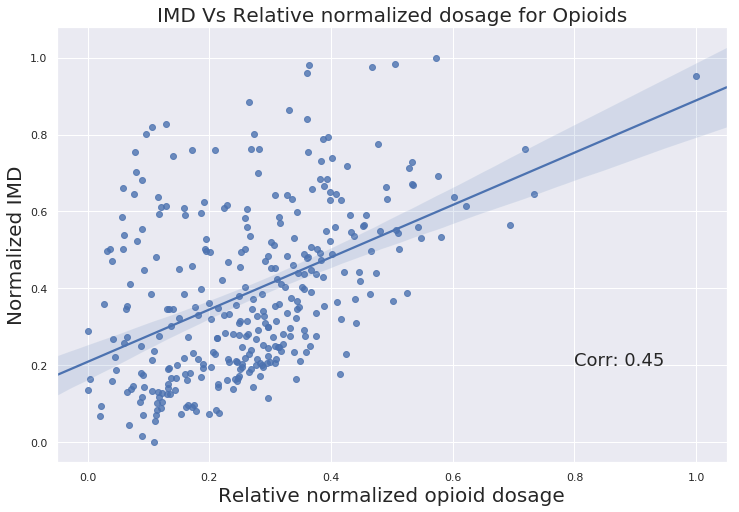

In [109]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Dosage',y='IMD',data=standardized_merged)
ax.set_title("IMD Vs Relative normalized dosage for Opioids" , fontsize=20)
ax.set_xlabel("Relative normalized opioid dosage",fontsize=20)
ax.set_ylabel("Normalized IMD",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.2),fontsize = 18)


In [110]:
corr = pearsonr(standardized_merged['Savings'], standardized_merged['IMD'])

Text(0.8,0.2,'Corr: 0.41')

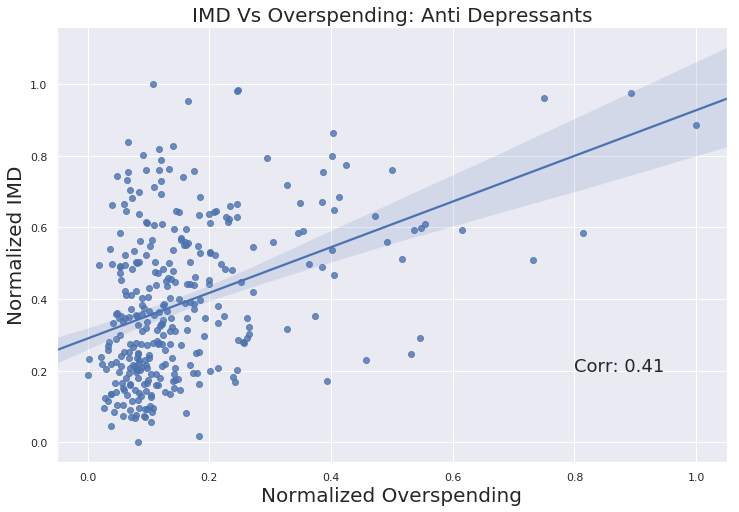

In [111]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Savings',y='IMD',data=standardized_merged)
ax.set_title("IMD Vs Overspending: Anti Depressants" , fontsize=20)
ax.set_xlabel("Normalized Overspending",fontsize=20)
ax.set_ylabel("Normalized IMD",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.2),fontsize = 18)


In [112]:
corr = pearsonr(standardized_merged['Savings'], standardized_merged['Seniors'])

Text(0.8,0.2,'Corr: -0.0')

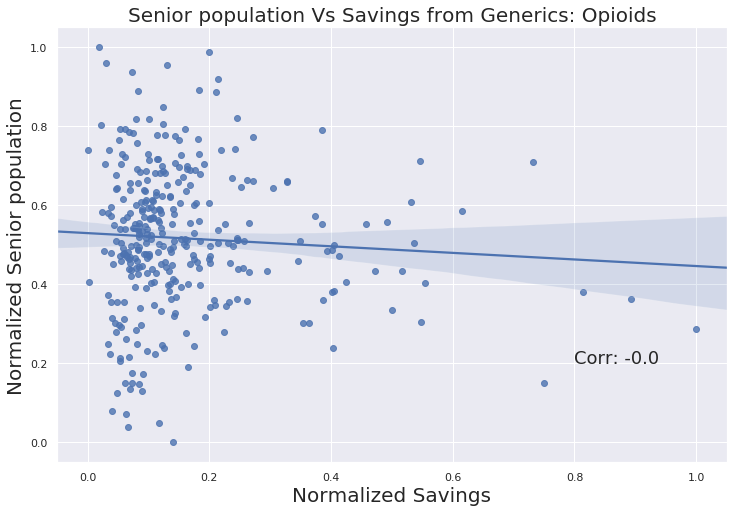

In [113]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Savings',y='Seniors',data=standardized_merged)
ax.set_title("Senior population Vs Savings from Generics: Opioids" , fontsize=20)
ax.set_xlabel("Normalized Savings",fontsize=20)
ax.set_ylabel("Normalized Senior population",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.2),fontsize = 18)

In [114]:
corr=pearsonr(standardized_merged['Savings'], standardized_merged['Density'])

Text(0.8,0.8,'Corr: -0.0')

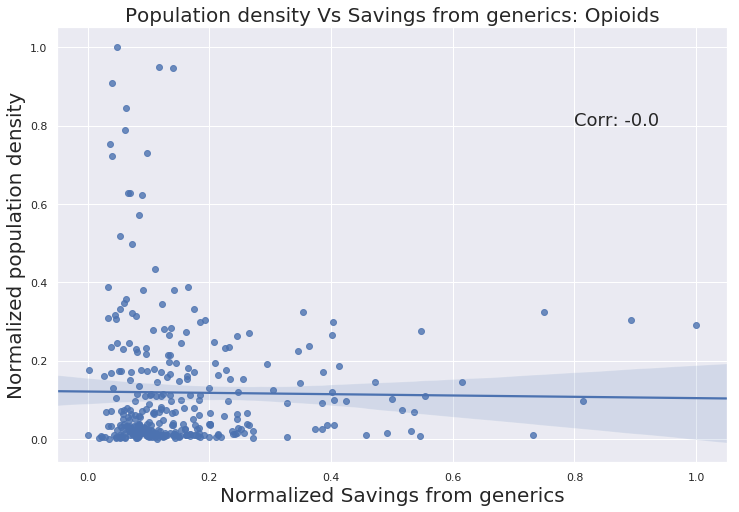

In [115]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Savings',y='Density',data=standardized_merged)
ax.set_title("Population density Vs Savings from generics: Opioids" ,fontsize=20)
ax.set_xlabel("Normalized Savings from generics",fontsize=20)
ax.set_ylabel("Normalized population density",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.8),fontsize = 18)

In [116]:
corr=pearsonr(standardized_merged['Dosage'], standardized_merged['Density'])

Text(0.8,0.8,'Corr: -0.3')

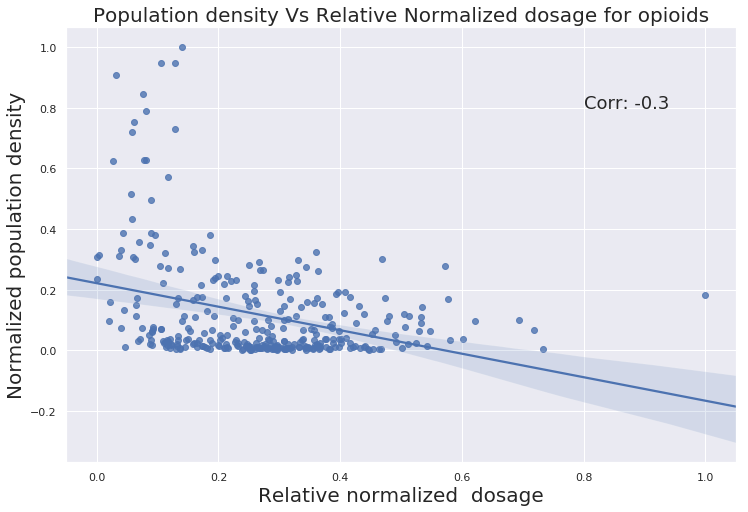

In [117]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Dosage',y='Density',data=standardized_merged)
ax.set_title("Population density Vs Relative Normalized dosage for opioids" ,fontsize=20)
ax.set_xlabel("Relative normalized  dosage",fontsize=20)
ax.set_ylabel("Normalized population density",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.8),fontsize = 18)


In [118]:
pearsonr(standardized_merged['Dosage'], standardized_merged['Seniors'])

(0.39424327122790115, 1.4413489509565682e-13)

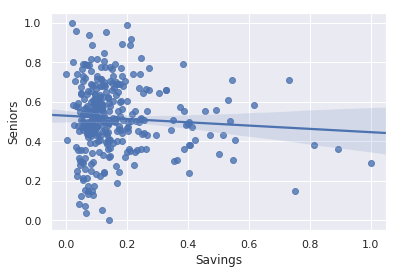

In [119]:
sns.regplot(x='Savings',y='Seniors',data=standardized_merged)

In [120]:
monthlySavings = {}
for k in monthly_borough_savings:
    monthlySavings[k] = np.median(monthly_borough_savings[k].values())
    
    
monthlyCosts = {}
for k in monthly_borough_costs:
    monthlyCosts[k] = np.median(monthly_borough_costs[k].values())